In [102]:
#Project Done By: Nischal R Gowda
#Email Id:        Gowda.NischalRamesh@in.bosch.com / nischalrgowda31@gmail.com

In [ ]:
#import library
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [103]:
# 1. Import a 311 NYC service request
NYC_311_DataSet = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv',low_memory=False,
    parse_dates=['Created Date', 'Closed Date'])
NYC_311_DataSet.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [104]:
NYC_311_DataSet.shape

(279600, 53)

In [105]:
#UnSpecified data in data set 
NYC_311_DataSet.replace('Unspecified',np.nan,inplace=True)

In [106]:
# Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing.
NYC_311_DataSet['Request_Closing_Time'] = (NYC_311_DataSet['Closed Date'] - NYC_311_DataSet['Created Date'])
NYC_311_DataSet['Request_Closing_Time']
NYC_311_DataSet.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",00:55:15
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",01:26:16
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",04:51:31
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",07:45:14
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",03:27:02


In [107]:
#mean request time observation:1
NYC_Request_Closing_Time_mean = NYC_311_DataSet['Request_Closing_Time'].mean()
NYC_Request_Closing_Time_mean

Timedelta('0 days 04:21:21.725545')

In [108]:
#NAN count sum
NYC_311_DataSet["Request_Closing_Time"].isnull().sum() 

2046

In [109]:
#data set sort city with assending order
NYC_311_DataSet.sort_values("City", axis = 0, ascending = True, 
				inplace = True, na_position ='last')
NYC_311_DataSet.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time
123515,31475549,2015-09-06 08:37:00,2015-09-06 10:41:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11692.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40.588658,-73.802789,"(40.58865787832559, -73.80278939102446)",02:04:00
209789,30907282,2015-06-22 04:15:16,2015-06-22 07:54:46,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11692.0,129 BEACH 56 PLACE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.591241,-73.786161,"(40.59124119388659, -73.78616144696414)",03:39:30
90630,31681498,2015-10-04 12:28:00,2015-10-04 13:39:00,NYPD,New York City Police Department,Derelict Vehicle,With License Plate,Street/Sidewalk,11692.0,62-21 BURCHELL PLACE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.596563,-73.792205,"(40.59656348212829, -73.79220467590899)",01:11:00
79001,31759911,2015-10-15 11:07:08,2015-10-15 12:03:06,NYPD,New York City Police Department,Animal Abuse,Other (complaint details),Street/Sidewalk,11692.0,342 BEACH 56 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.593574,-73.786122,"(40.59357420610759, -73.78612156933204)",00:55:58
237330,30729090,2015-05-29 22:08:27,2015-05-29 22:28:23,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Music,Street/Sidewalk,11692.0,119 BEACH 59 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.590217,-73.788732,"(40.590216645707564, -73.78873190823747)",00:19:56


In [110]:
NYC_311_DataSet.dtypes

Unique Key                                  int64
Created Date                       datetime64[ns]
Closed Date                        datetime64[ns]
Agency                                     object
Agency Name                                object
Complaint Type                             object
Descriptor                                 object
Location Type                              object
Incident Zip                              float64
Incident Address                           object
Street Name                                object
Cross Street 1                             object
Cross Street 2                             object
Intersection Street 1                      object
Intersection Street 2                      object
Address Type                               object
City                                       object
Landmark                                   object
Facility Type                              object
Status                                     object


In [111]:
# grouping the complaint type by citys counts
NYC_311_data_complaints_count = NYC_311_DataSet.groupby('Complaint Type').City.count()
NYC_311_data_complaints_count

Complaint Type
Agency Issues                    0
Animal Abuse                  7163
Bike/Roller/Skate Chronic      393
Blocked Driveway             71379
Derelict Vehicle             16206
Disorderly Youth               261
Drinking                      1218
Ferry Complaint                  0
Graffiti                        97
Homeless Encampment           4200
Illegal Fireworks              168
Illegal Parking              69064
Noise - Commercial           31942
Noise - House of Worship       860
Noise - Park                  3890
Noise - Street/Sidewalk      45256
Noise - Vehicle              15764
Panhandling                    295
Posting Advertisement          634
Squeegee                         2
Traffic                       4204
Urinating in Public            572
Vending                       3569
Name: City, dtype: int64

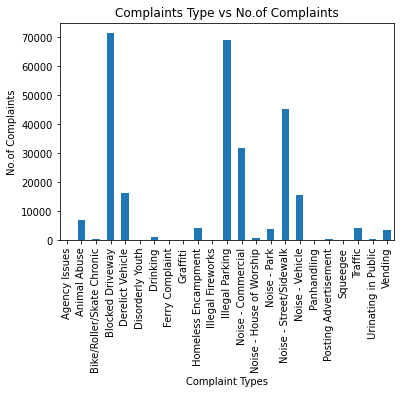

In [112]:
x=NYC_311_DataSet.groupby('Complaint Type').City.count()
x.plot.bar()
plt.xlabel("Complaint Types")
plt.ylabel("No.of Complaints")
plt.title("Complaints Type vs No.of Complaints")
plt.show()

In [113]:
NYC_311_DataSet_complaints = NYC_311_DataSet.groupby('Complaint Type').City.count()
NYC_311_DataSet_complaints

Complaint Type
Agency Issues                    0
Animal Abuse                  7163
Bike/Roller/Skate Chronic      393
Blocked Driveway             71379
Derelict Vehicle             16206
Disorderly Youth               261
Drinking                      1218
Ferry Complaint                  0
Graffiti                        97
Homeless Encampment           4200
Illegal Fireworks              168
Illegal Parking              69064
Noise - Commercial           31942
Noise - House of Worship       860
Noise - Park                  3890
Noise - Street/Sidewalk      45256
Noise - Vehicle              15764
Panhandling                    295
Posting Advertisement          634
Squeegee                         2
Traffic                       4204
Urinating in Public            572
Vending                       3569
Name: City, dtype: int64

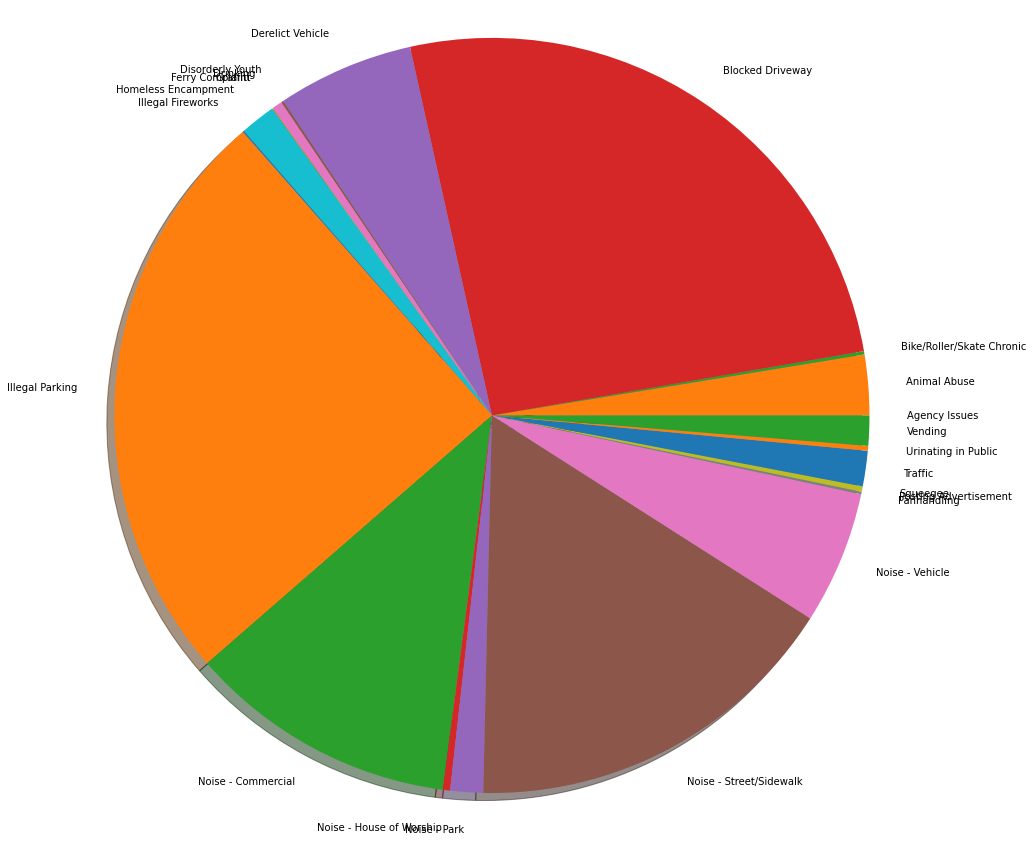

In [114]:
#pie chart for complaint types grouped by citys
plt.figure(figsize=(15,15))
labels = NYC_311_DataSet_complaints.keys()
sizes = NYC_311_DataSet_complaints
plt.pie(sizes,labels=labels,shadow=True) 
plt.axis('equal')
plt.show()

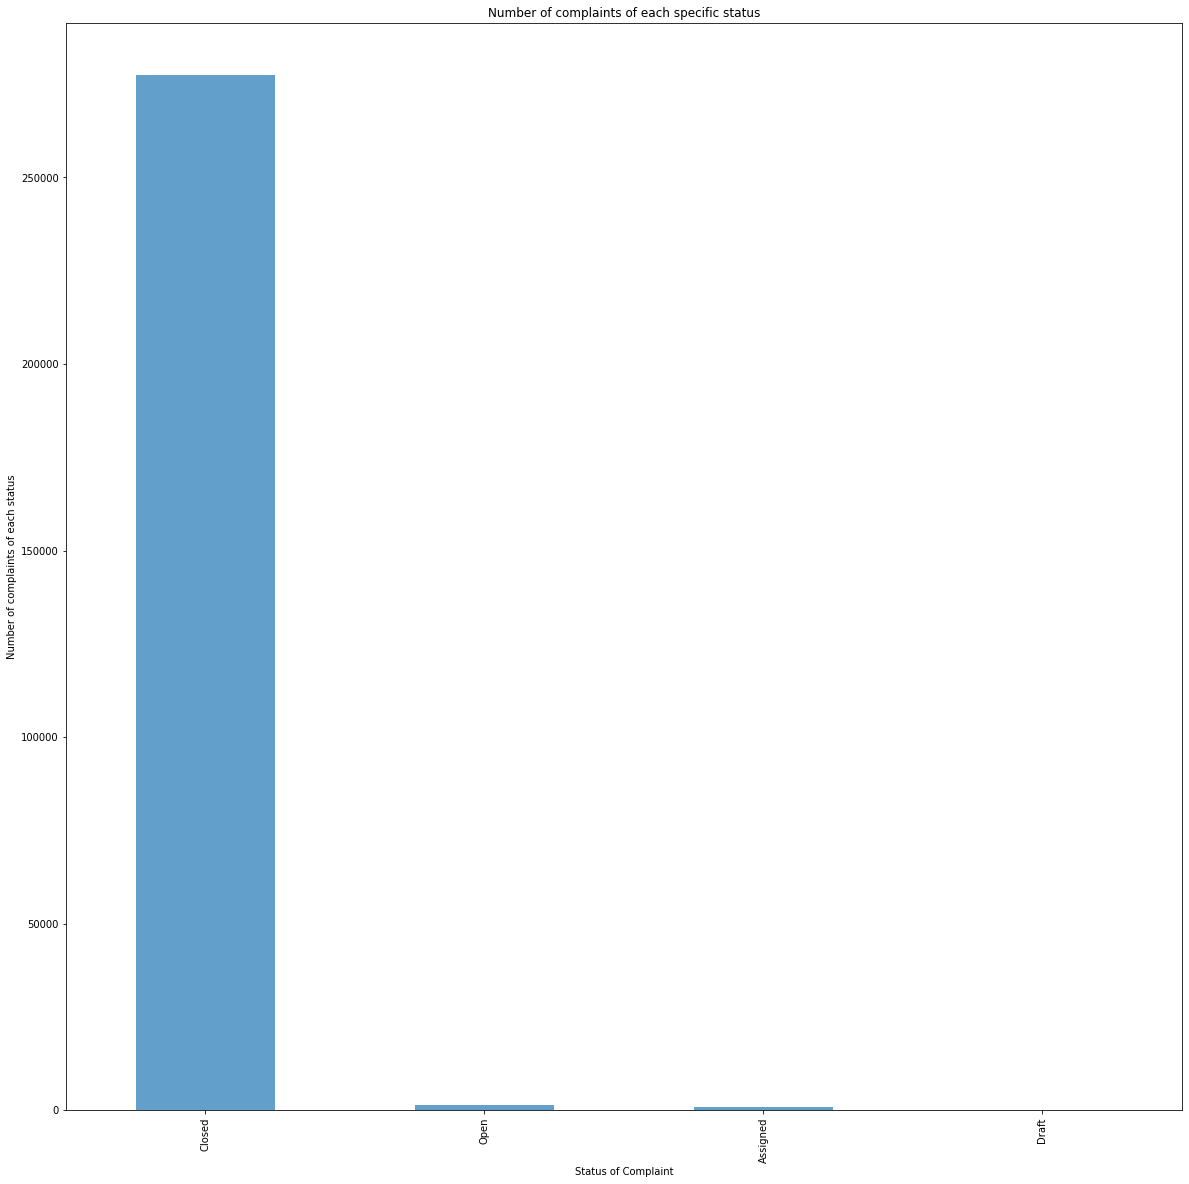

In [115]:
#plot showing status of the requests
NYC_311_DataSet['Status'].value_counts().plot(kind='bar',alpha=0.7,figsize=(20,20))
plt.xlabel("Status of Complaint")
plt.ylabel("Number of complaints of each status")
plt.title("Number of complaints of each specific status")
plt.show()

In [116]:
Complaint_value_count=NYC_311_DataSet['Complaint Type'].value_counts()
Complaint_value_count 

Blocked Driveway             71651
Illegal Parking              70030
Noise - Street/Sidewalk      45847
Noise - Commercial           32301
Derelict Vehicle             16360
Noise - Vehicle              15815
Animal Abuse                  7172
Traffic                       4207
Homeless Encampment           4201
Noise - Park                  3916
Vending                       3574
Drinking                      1226
Noise - House of Worship       862
Posting Advertisement          635
Urinating in Public            572
Bike/Roller/Skate Chronic      398
Panhandling                    297
Disorderly Youth               261
Illegal Fireworks              168
Graffiti                        97
Agency Issues                    6
Ferry Complaint                  2
Squeegee                         2
Name: Complaint Type, dtype: int64

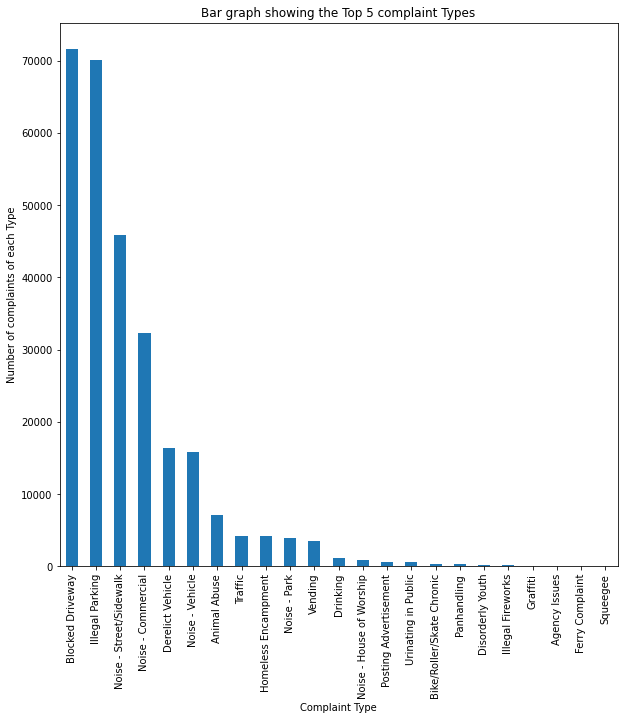

In [117]:
#Bar graph to show the compalint type and its count
plt.figure(figsize=(10,10))
x=NYC_311_DataSet['Complaint Type'].value_counts()
x.plot.bar()
plt.xlabel("Complaint Type")
plt.ylabel("Number of complaints of each Type")
plt.title("Bar graph showing the Top 5 complaint Types")
plt.show()

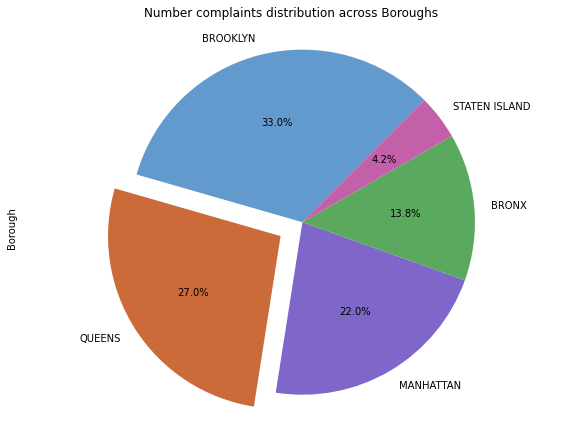

In [118]:
# complaints distribution across Boroughs
colors = ['#639ace','#ca6b39','#7f67ca','#5ba85f','#c360aa','#a7993f','#cc566a']
NYC_311_DataSet['Borough'].value_counts().plot(kind='pie',autopct='%1.1f%%',
                        explode = (0.0, 0.15, 0, 0, 0.0), startangle=45, shadow=False, colors = colors,
                        figsize = (8,6))
plt.axis('equal')
plt.title('Number complaints distribution across Boroughs\n')
plt.tight_layout()
plt.show()

In [119]:
#3. Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations. 

NYC_311_DataSet['Request_Closing_Time_Hour']=round(NYC_311_DataSet['Request_Closing_Time'].dt.total_seconds()/3600,4)
NYC_311_DataSet.head() 

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time,Request_Closing_Time_Hour
123515,31475549,2015-09-06 08:37:00,2015-09-06 10:41:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11692.0,NaN,...,NaN,NaN,NaN,NaN,NaN,40.588658,-73.802789,"(40.58865787832559, -73.80278939102446)",02:04:00,2.0667
209789,30907282,2015-06-22 04:15:16,2015-06-22 07:54:46,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11692.0,129 BEACH 56 PLACE,...,NaN,NaN,NaN,NaN,NaN,40.591241,-73.786161,"(40.59124119388659, -73.78616144696414)",03:39:30,3.6583
90630,31681498,2015-10-04 12:28:00,2015-10-04 13:39:00,NYPD,New York City Police Department,Derelict Vehicle,With License Plate,Street/Sidewalk,11692.0,62-21 BURCHELL PLACE,...,NaN,NaN,NaN,NaN,NaN,40.596563,-73.792205,"(40.59656348212829, -73.79220467590899)",01:11:00,1.1833
79001,31759911,2015-10-15 11:07:08,2015-10-15 12:03:06,NYPD,New York City Police Department,Animal Abuse,Other (complaint details),Street/Sidewalk,11692.0,342 BEACH 56 STREET,...,NaN,NaN,NaN,NaN,NaN,40.593574,-73.786122,"(40.59357420610759, -73.78612156933204)",00:55:58,0.9328
237330,30729090,2015-05-29 22:08:27,2015-05-29 22:28:23,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Music,Street/Sidewalk,11692.0,119 BEACH 59 STREET,...,NaN,NaN,NaN,NaN,NaN,40.590217,-73.788732,"(40.590216645707564, -73.78873190823747)",00:19:56,0.3322


In [120]:
NYC_311_DataSet['Request_Closing_Time_Hour'].dtype

dtype('float64')

In [121]:
# Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.
Request_closing_time_mean =NYC_311_DataSet.groupby(['City','Complaint Type']).agg({'Request_Closing_Time_Hour': ['mean']})
Request_closing_time_mean

Request_Closing_Time_Hour
                                                      mean
City     Complaint Type                                   
ARVERNE  Animal Abuse                             2.153624
         Blocked Driveway                         2.583597
         Derelict Vehicle                         3.072036
         Disorderly Youth                         3.591250
         Drinking                                 0.238600
...                                                    ...
WOODSIDE Vending                                  7.302093
Woodside Blocked Driveway                         6.551820
         Derelict Vehicle                         4.966650
         Illegal Parking                          5.232363
         Noise - Street/Sidewalk                  3.489100

[751 rows x 1 columns]

In [122]:
# taking different complaint type for finding P-values using F-sta
NYC_311_DataSet['Complaint Type'].value_counts()

Blocked Driveway             71651
Illegal Parking              70030
Noise - Street/Sidewalk      45847
Noise - Commercial           32301
Derelict Vehicle             16360
Noise - Vehicle              15815
Animal Abuse                  7172
Traffic                       4207
Homeless Encampment           4201
Noise - Park                  3916
Vending                       3574
Drinking                      1226
Noise - House of Worship       862
Posting Advertisement          635
Urinating in Public            572
Bike/Roller/Skate Chronic      398
Panhandling                    297
Disorderly Youth               261
Illegal Fireworks              168
Graffiti                        97
Agency Issues                    6
Ferry Complaint                  2
Squeegee                         2
Name: Complaint Type, dtype: int64

In [123]:
NYC_311_DataSet[['Complaint Type','Request_Closing_Time_Hour']].isnull().sum()

Complaint Type                  0
Request_Closing_Time_Hour    2046
dtype: int64

In [139]:
NYC_311_DataSet.dropna(subset=['Request_Closing_Time_Hour'],inplace=True)

In [140]:
NYC_311_DataSet_S1 = NYC_311_DataSet[NYC_311_DataSet['Complaint Type']=='Blocked Driveway']['Request_Closing_Time_Hour']
NYC_311_DataSet_S1.head()

71442     1.4078
250174    4.2647
190071    2.9333
83311     4.2500
192587    4.7500
Name: Request_Closing_Time_Hour, dtype: float64

In [141]:
NYC_311_DataSet_S2 = NYC_311_DataSet[NYC_311_DataSet['Complaint Type']=='Illegal Parking']['Request_Closing_Time_Hour']
NYC_311_DataSet_S2.head()

123515    2.0667
276599    1.9708
74824     6.6167
246749    5.8511
202785    2.0022
Name: Request_Closing_Time_Hour, dtype: float64

In [142]:
NYC_311_DataSet_S3 = NYC_311_DataSet[NYC_311_DataSet['Complaint Type']=='Noise - Street/Sidewalk']['Request_Closing_Time_Hour']
NYC_311_DataSet_S3.head()

209789    3.6583
134468    1.3633
243167    1.2881
234863    2.2908
103628    0.9633
Name: Request_Closing_Time_Hour, dtype: float64

In [169]:
NYC_311_DataSet_S4 = NYC_311_DataSet[NYC_311_DataSet['Complaint Type']=='Noise - Commercial']['Request_Closing_Time_Hour']
NYC_311_DataSet_S4.head()

5256      1.5103
47433     3.0642
203850    3.8664
4215      0.4997
16469     2.8525
Name: Request_Closing_Time_Hour, dtype: float64

In [170]:
NYC_311_DataSet_S5 = NYC_311_DataSet[NYC_311_DataSet['Complaint Type']=='Derelict Vehicle']['Request_Closing_Time_Hour']
NYC_311_DataSet_S5.head()

90630     1.1833
17272     1.8483
231160    2.1833
231163    4.7500
224690    4.7833
Name: Request_Closing_Time_Hour, dtype: float64

In [173]:
import scipy.stats as st
st.f_oneway(NYC_311_DataSet_S1,NYC_311_DataSet_S2,NYC_311_DataSet_S3,NYC_311_DataSet_S4,NYC_311_DataSet_S5)

F_onewayResult(statistic=1713.2906452137647, pvalue=0.0)

In [174]:
#We can see pvalue is less than 0.05 so we reject null hypothesis and average response time is not same.

In [175]:
NYC_311_DataSet_city_type = pd.crosstab(NYC_311_DataSet['Complaint Type'], NYC_311_DataSet['City']) 
NYC_311_DataSet_city_type

City,ARVERNE,ASTORIA,Astoria,BAYSIDE,BELLEROSE,BREEZY POINT,BRONX,BROOKLYN,CAMBRIA HEIGHTS,CENTRAL PARK,...,SAINT ALBANS,SOUTH OZONE PARK,SOUTH RICHMOND HILL,SPRINGFIELD GARDENS,STATEN ISLAND,SUNNYSIDE,WHITESTONE,WOODHAVEN,WOODSIDE,Woodside
Complaint Type,,,,,,,,,,,,,,,,,,,,,
Animal Abuse,38,118,0,34,6,1,1300,2217,11,0,...,29,53,25,23,513,35,26,44,61,0
Bike/Roller/Skate Chronic,0,15,0,0,1,0,18,100,0,0,...,0,1,1,0,6,2,4,2,4,0
Blocked Driveway,34,2424,106,355,86,3,11856,26246,137,0,...,225,875,1453,243,2009,193,191,998,1495,10
Derelict Vehicle,25,320,10,183,75,2,1810,4817,104,0,...,180,328,263,197,1643,10,206,287,226,2
Disorderly Youth,2,3,0,1,2,0,58,71,0,0,...,1,2,2,0,15,2,1,0,1,0
Drinking,1,35,0,1,0,1,179,239,0,0,...,3,12,20,6,173,10,2,3,15,0
Graffiti,0,3,0,3,0,0,9,38,0,0,...,0,0,0,0,2,1,1,0,2,0
Homeless Encampment,4,32,0,2,1,0,237,805,5,0,...,7,4,11,5,65,10,0,8,31,0
Illegal Fireworks,0,4,0,0,1,0,24,61,1,0,...,0,1,2,1,10,0,1,0,1,0


In [176]:
#from scipy.stats import chi2_contingency
#from scipy.stats import chi2 

stat, p, dof, expected = stats.chi2_contingency(NYC_311_DataSet_city_type) 
print(p)

0.0


In [177]:
#We can see pvalue is less than 0.05 so we reject null hypothesis means Complain Type and city is independent means not related.